<a href="https://colab.research.google.com/github/aLuizab/quarentenaDados/blob/master/QuarentenaDados_Aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
#dataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head() 

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
filmes["generos"].str.get_dummies("|")

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
filmes["generos"].str.get_dummies("|").sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [5]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

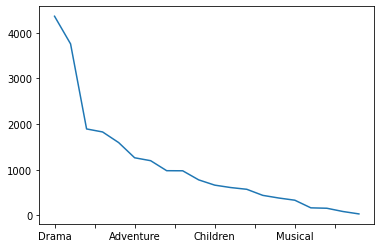

In [6]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot()

In [0]:
import matplotlib.pyplot as plt

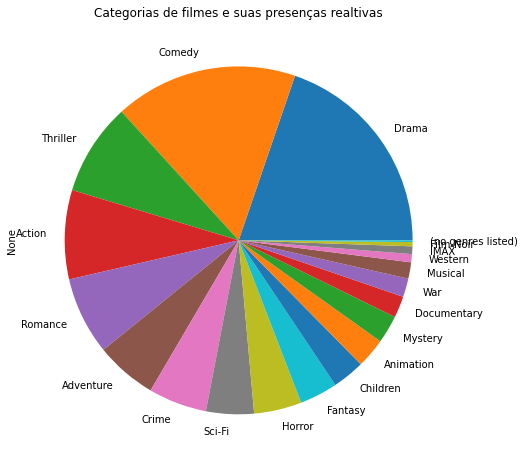

In [9]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind = 'pie', 
    title='Categorias de filmes e suas presenças realtivas',
    figsize=(8,8))
plt.show()

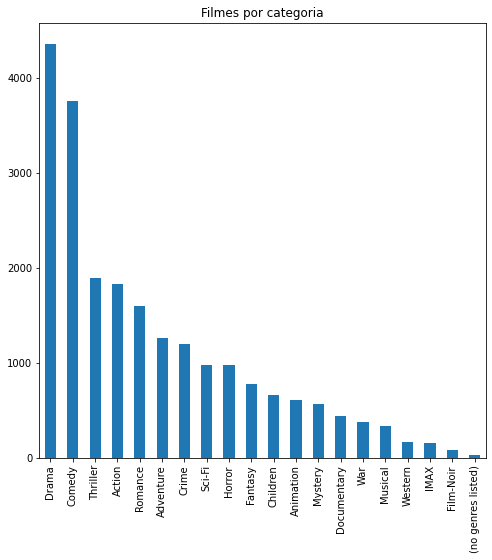

In [10]:
filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False).plot(
    kind = 'bar', 
    title='Filmes por categoria',
    figsize=(8,8))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


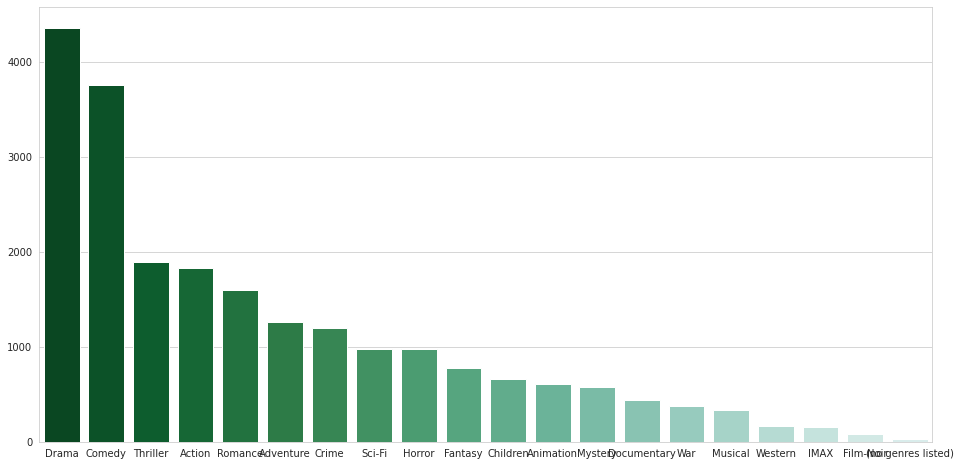

In [12]:
import seaborn as sns
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index, 
            y=filmes_por_genero.values, 
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero)+4))
plt.show()

In [17]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [18]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [19]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


3.9209302325581397


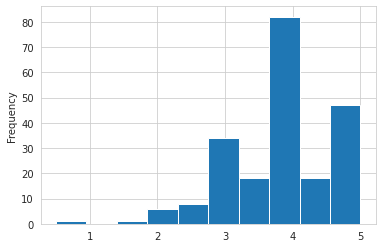

In [21]:
notas_do_filme_1 = avaliacoes.query("filmeId == 1")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


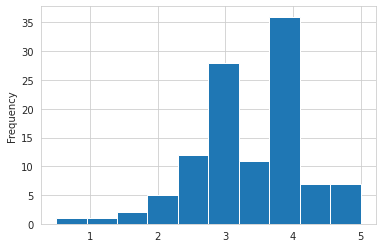

In [22]:
notas_do_filme_1 = avaliacoes.query("filmeId == 2")["nota"]
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

In [23]:
filmes_com_media.sort_values("nota", ascending=False)[2450:2500]

,filmeId,titulo,generos,nota
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [0]:
def plot_filme(n):
    notas_do_filme = avaliacoes.query(f"filmeId == {n}")["nota"]
    notas_do_filme.plot(kind='hist')
    return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

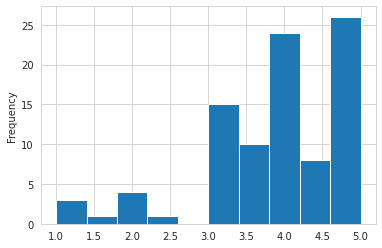

In [25]:
#o magico de Oz
plot_filme(919)

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

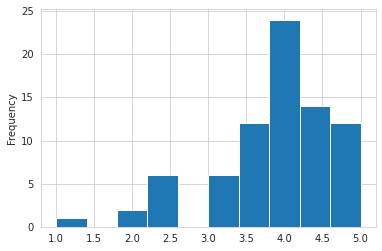

In [26]:
#little miss sunshine
plot_filme(46578)

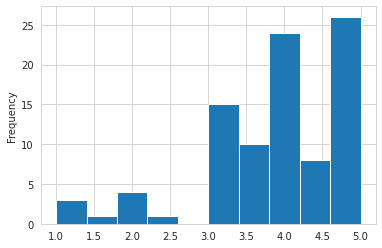

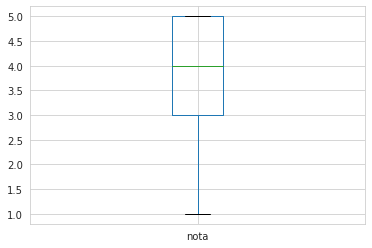

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

In [27]:
def plot_filme(n):
    notas_do_filme = avaliacoes.query(f"filmeId == {n}")["nota"]
    notas_do_filme.plot(kind='hist')
    plt.show()
    print('\n')
    notas_do_filme.plot.box()
    plt.show()
    return notas_do_filme.describe()
plot_filme(919)

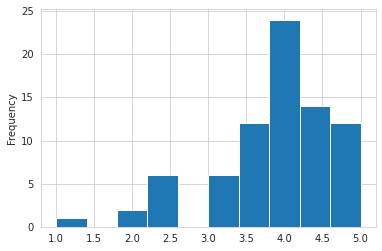

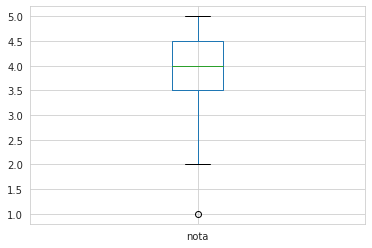

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [28]:
plot_filme(46578)

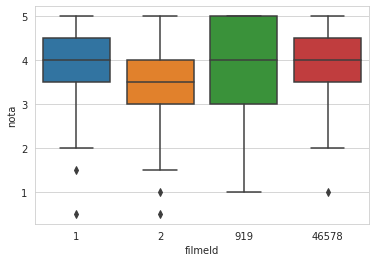

In [29]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x = "filmeId", y = "nota")

Desafio 1

In [0]:
#Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

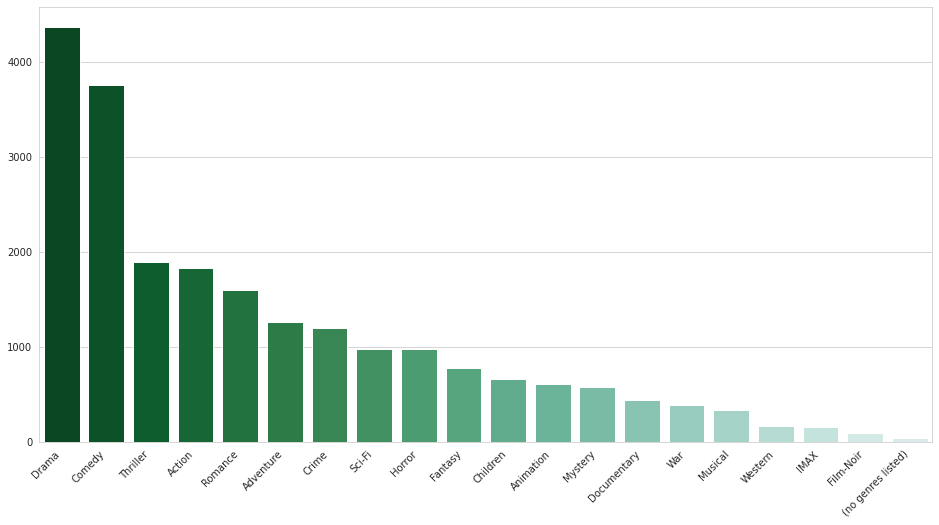

In [33]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=45, horizontalalignment = 'right')

sns.barplot(x = filmes_por_genero.index,
            y = filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.show()

Desafio 2

In [0]:
#Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

In [39]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [64]:
filmes_com_media.columns = ["filmeId", "titulos", "genero", "nota_media"]
filmes_com_media

,filmeId,titulos,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [48]:
filmes_com_media.query("nota_media == 3.89").head()

,FilmeId,títulos,gênero,nota_media
5885,33166,Crash (2004),Crime|Drama,3.89


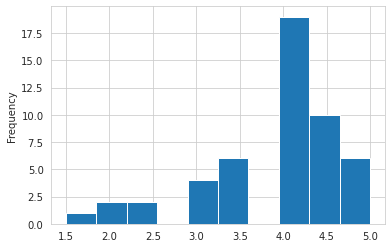

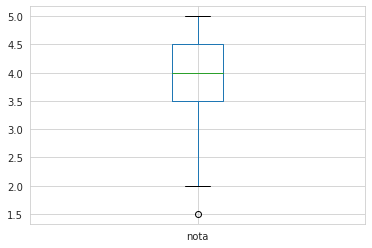

count    50.000000
mean      3.890000
std       0.809951
min       1.500000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64

In [51]:
plot_filme(33166)

Desafio 3

In [0]:
#Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

Text(0.5, 0, 'Nome do Filme')

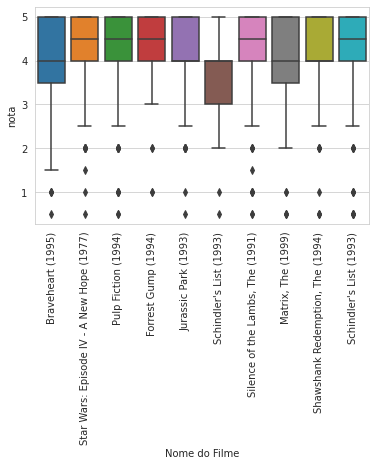

In [57]:
av_filmes_mais_votos = avaliacoes[avaliacoes["filmeId"].isin(filmes_com_qt_votos["filmeId"])]
av_filmes_mais_votos = av_filmes_mais_votos.merge(filmes_com_qt_votos, on = "filmeId", how="left")
boxplot_filmes_com_mais_votos = sns.boxplot(data = av_filmes_mais_votos, x= "filmeId", y ="nota")
boxplot_filmes_com_mais_votos.set_xticklabels(av_filmes_mais_votos["titulo"], rotation = 90)
boxplot_filmes_com_mais_votos.set_xlabel("Nome do Filme")

Desafio 4

In [0]:
#Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

Text(0.5, 0, 'Nome do Filme')

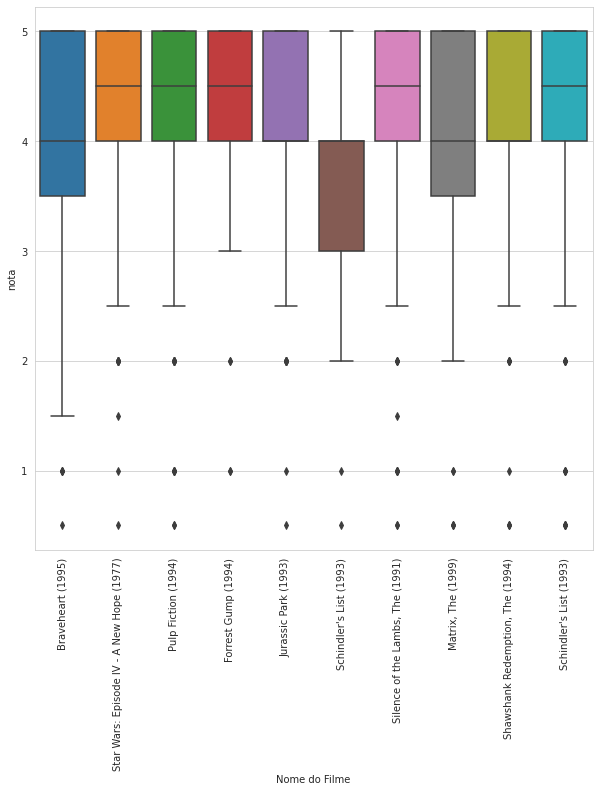

In [59]:
plt.figure(figsize=(10, 10))
boxplot_filmes_com_mais_votos = sns.boxplot(data = av_filmes_mais_votos, x ="filmeId", y="nota")
boxplot_filmes_com_mais_votos.set_xticklabels(av_filmes_mais_votos["titulo"], rotation = 90)
boxplot_filmes_com_mais_votos.set_xlabel("Nome do Filme")

Desafio 5

In [0]:
#Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [67]:
filmes_com_media

,filmeId,titulos,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [69]:
filmes_com_media_baixa = filmes_com_media.query("nota_media >= 0.4 and nota_media <= 0.8").head(3)
filmes_com_media_media = filmes_com_media.query("nota_media >= 2.2 and nota_media <= 3.1").head(3)
filmes_com_media_alta = filmes_com_media.query("nota_media >= 4 and nota_media <= 5").head(3)
avaliacoes_com_filmes = avaliacoes.merge(filmes, on="filmeId", how="left")

def moda_media_mediana_filmes(df):
  
  for index, row in df.iterrows():
    
    print("Filme :     %s     " % row["titulos"])
    avaliacoes_do_filme = avaliacoes_com_filmes[avaliacoes_com_filmes["filmeId"] == row["filmeId"]]
    print("Moda: %s" % avaliacoes_do_filme["nota"].mode())
    print("Média: %s" % avaliacoes_do_filme["nota"].mean())
    print("Mediana: %s" % avaliacoes_do_filme["nota"].median())

print("Filmes com notas baixas")
moda_media_mediana_filmes(filmes_com_media_baixa)

print("Filmes com notas médias")
moda_media_mediana_filmes(filmes_com_media_media)

print("Filmes com notas altas")
moda_media_mediana_filmes(filmes_com_media_alta)

Filmes com notas baixas
Filme :     Amityville Curse, The (1990)     
Moda: 0    0.5
1    1.0
dtype: float64
Média: 0.75
Mediana: 0.75
Filme :     Gypsy (1962)     
Moda: 0    0.5
dtype: float64
Média: 0.5
Mediana: 0.5
Filme :     House Party 2 (1991)     
Moda: 0    0.5
1    1.0
dtype: float64
Média: 0.75
Mediana: 0.75
Filmes com notas médias
Filme :     Waiting to Exhale (1995)     
Moda: 0    3.0
dtype: float64
Média: 2.357142857142857
Mediana: 3.0
Filme :     Father of the Bride Part II (1995)     
Moda: 0    3.0
dtype: float64
Média: 3.0714285714285716
Mediana: 3.0
Filme :     Tom and Huck (1995)     
Moda: 0    3.0
dtype: float64
Média: 2.875
Mediana: 3.0
Filmes com notas altas
Filme :     Persuasion (1995)     
Moda: 0    4.5
dtype: float64
Média: 4.2272727272727275
Mediana: 4.5
Filme :     City of Lost Children, The (Cité des enfants perdus, La) (1995)     
Moda: 0    4.0
dtype: float64
Média: 4.0131578947368425
Mediana: 4.0
Filme :     Cry, the Beloved Country (1995)     
Moda

Desafio 6

In [0]:
#Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

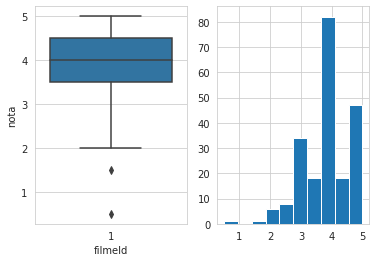

In [71]:
f, axes = plt.subplots(1, 2)
sns.boxplot(data = avaliacoes.query("filmeId==1"), x ="filmeId", y="nota", ax=axes[0])
avaliacoes.query("filmeId==1")["nota"].hist(ax = axes[1])

Desafio 7

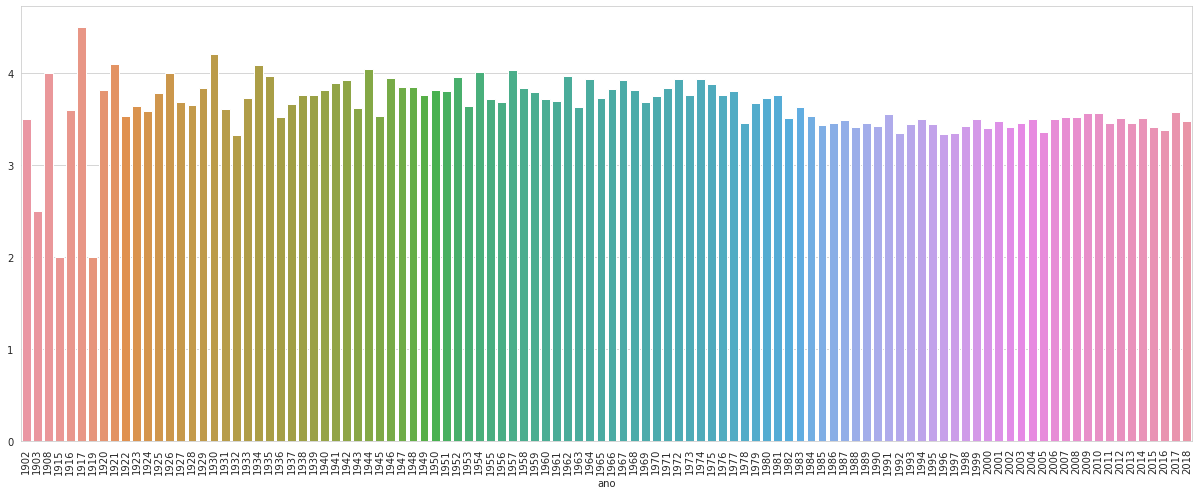

In [72]:
filmes["ano"] = filmes["titulo"].str.extract(pat = '(\([0-9][0-9][0-9][0-9]\)$)')
filmes["ano"] = filmes["ano"].str.replace('(', '').str.replace(')', '')
avaliacoes_com_filmes_e_ano = avaliacoes.merge(filmes, on="filmeId", how="left")
media_avaliacao_por_ano = avaliacoes_com_filmes_e_ano.groupby("ano")["nota"].mean()

plt.figure(figsize=(21,8))
barra_media_por_ano =sns.barplot(x=media_avaliacao_por_ano.index,
            y=media_avaliacao_por_ano.values
            )
barra_media_por_ano.set_xticklabels(barra_media_por_ano.get_xticklabels(), rotation=90)
plt.show()
